In [1]:
# Group Assignment 2 - Rodrigo Gutierrez
## The members of my group are Annie Chan, Max Garcia, Miles Kim Parr, and Aydin Pasebani
### Here I am taking a look at income and the demographics of occupied housing units.

In [ ]:
#Importing the libraries into my notebook. Matplotlib and seaborn are imported for graphs

In [2]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Here I am reading in the CSV file I downloaded from the 2020 Census about the demographics of occupied housing units, the GEO_ID is imported as a string
# in order to ensure leading zeros are included. I cleaned this data in Excel before to only get the data I need.

In [3]:
housing = pd.read_csv(
    'data/Housing_data.csv' ,
    dtype=
    {
            'GEO_ID': str
    }

)

In [ ]:
# Here I am looking am using .shape in order to see how many rows and columns there are

In [4]:
housing.shape

(2498, 10)

In [ ]:
# Here I am using .head() to see the first five rows

In [5]:
housing.head()

GEO_ID  tot_hh  hh_white  hh_afram  hh_amerind  hh_asian  \
0  06037101110    1494      1105         0           0        92   
1  06037101122    1372      1064        10           0       136   
2  06037101220    1357       785         8          25       187   
3  06037101221    1450      1089        68           0        39   
4  06037101222     935       820        17           0        35   

   hh_nathawaii  hh_mixed  hh_latino  hh_whitenolatino  
0             0       209        401               951  
1             0       105         89              1045  
2             0       204        497               589  
3             0        66        329               983  
4            17        18        246               620

In [ ]:
# Here I am using .info to garner index dtype and columns, non-null values and memory usage

In [6]:
housing.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   GEO_ID            2498 non-null   object
 1   tot_hh            2498 non-null   int64 
 2   hh_white          2498 non-null   int64 
 3   hh_afram          2498 non-null   int64 
 4   hh_amerind        2498 non-null   int64 
 5   hh_asian          2498 non-null   int64 
 6   hh_nathawaii      2498 non-null   int64 
 7   hh_mixed          2498 non-null   int64 
 8   hh_latino         2498 non-null   int64 
 9   hh_whitenolatino  2498 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 195.3+ KB


In [ ]:
# Here I am finding out if any columns that are empty made it through

In [7]:
housing.columns[housing.isna().all()].tolist()

[]

In [ ]:
# Here I am plotting the total number of occupied households on a histogram

<Axes: ylabel='Frequency'>

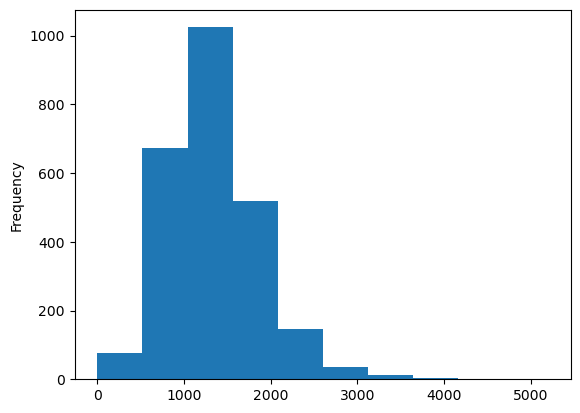

In [8]:
housing['tot_hh'].plot.hist()

In [ ]:
# Here I am focusing on the number of occupied housing units made up of White people

<Axes: ylabel='Frequency'>

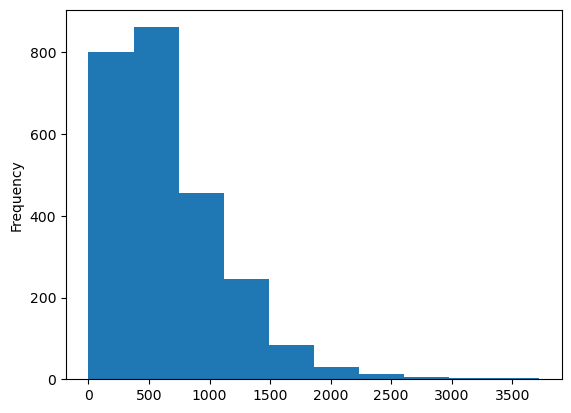

In [9]:
housing['hh_white'].plot.hist()

In [ ]:
# Here I am focusing on the number of occupied housing units made up of African Americans

<Axes: ylabel='Frequency'>

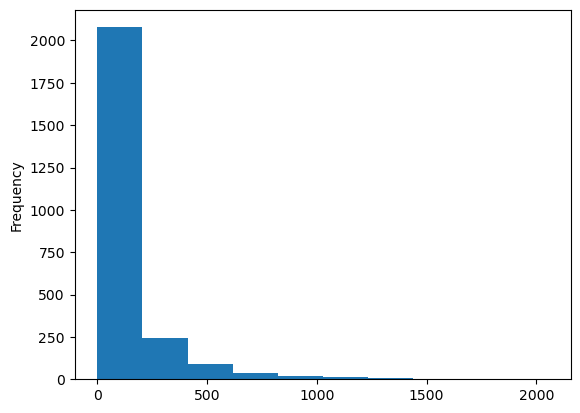

In [10]:
housing['hh_afram'].plot.hist()

In [ ]:
# Here I am focusing on the number of occupied housing units made up of American Indians

<Axes: ylabel='Frequency'>

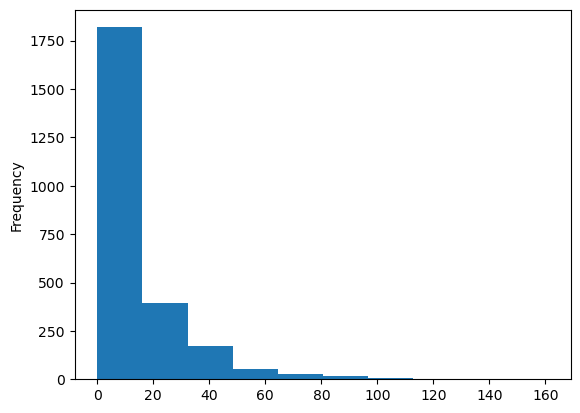

In [11]:
housing['hh_amerind'].plot.hist()

In [ ]:
# Here I am focusing on the number of occupied housing units made up of Asians

<Axes: ylabel='Frequency'>

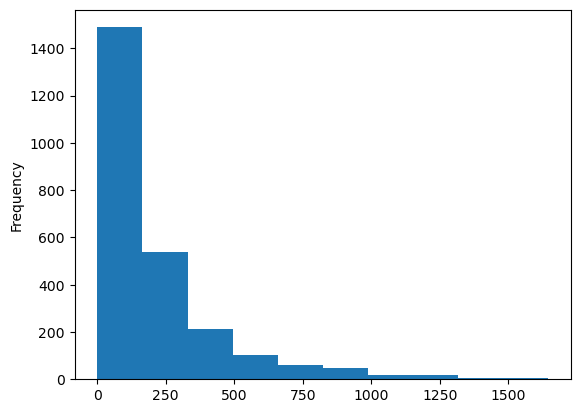

In [12]:
housing['hh_asian'].plot.hist()

In [ ]:
# Here I am focusing on the number of occupied housing units made up of Native Hawaiian/Pacific Islanders

<Axes: ylabel='Frequency'>

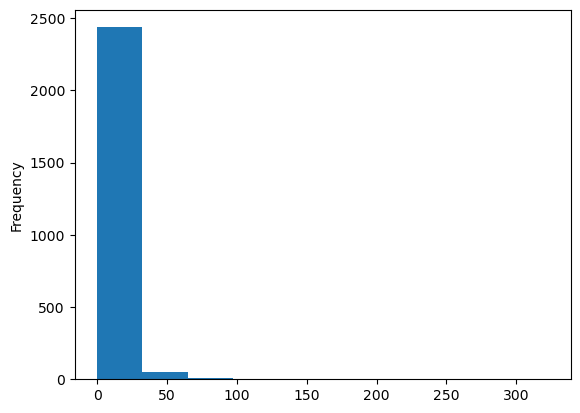

In [13]:
housing['hh_nathawaii'].plot.hist()

In [ ]:
# Here I am focusing on the number of occupied housing units made up of mixed race individuals

<Axes: ylabel='Frequency'>

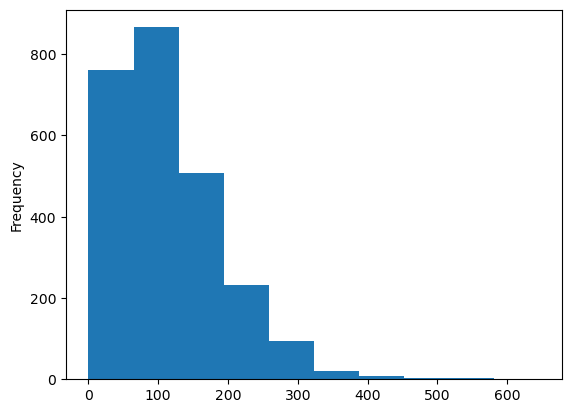

In [14]:
housing['hh_mixed'].plot.hist()

In [ ]:
# Here I am focusing on the number of occupied housing units made up of Latinos

<Axes: ylabel='Frequency'>

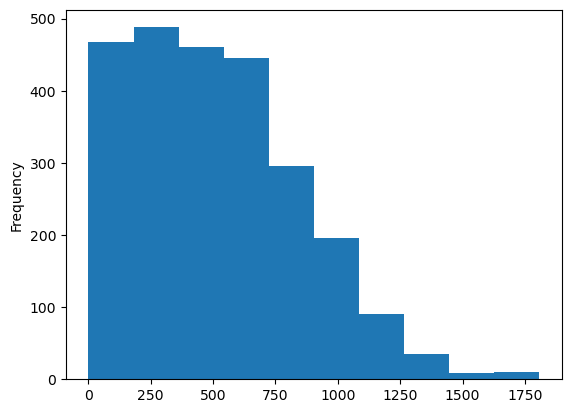

In [15]:
housing['hh_latino'].plot.hist()

In [ ]:
# Here I am focusing on the number of occupied housing units made up of White people not including the ethnicity of Latinos

<Axes: ylabel='Frequency'>

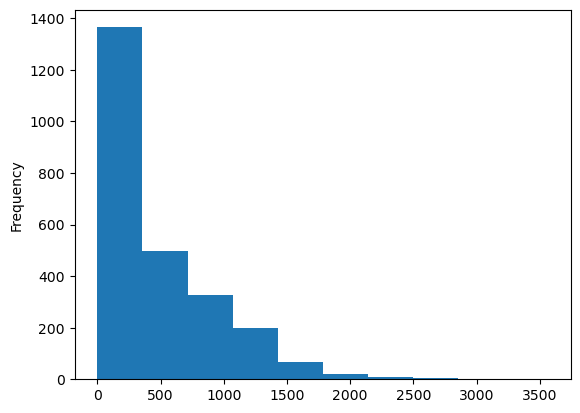

In [16]:
housing['hh_whitenolatino'].plot.hist()

In [73]:
# Here I am using a scatter plot to compare on the number of occupied housing units made up of White people and African Americans, the data shows White people have more

<Axes: xlabel='hh_white', ylabel='hh_afram'>

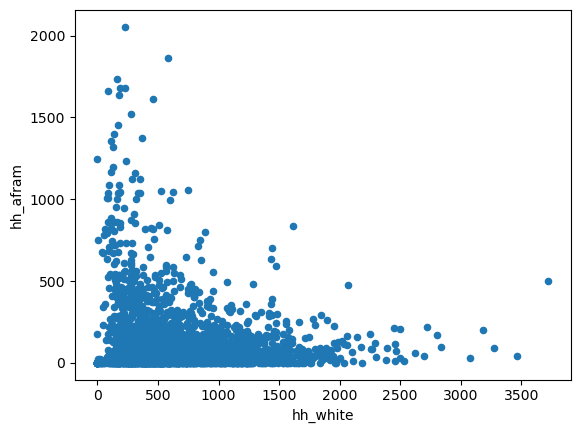

In [17]:
housing.plot.scatter(x = 'hh_white', y = 'hh_afram')

<Axes: xlabel='hh_white', ylabel='hh_afram'>

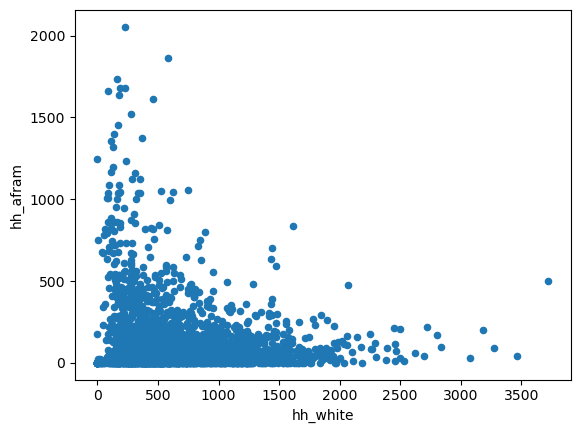

In [17]:
housing.plot.scatter(x = 'hh_white', y = 'hh_afram')

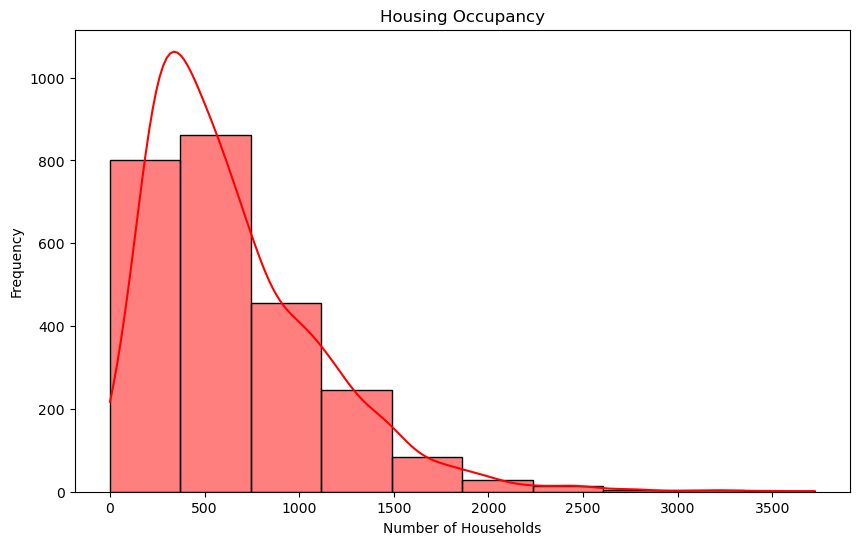

In [18]:
#Here I am using this histogram to show the housing occupancy of white Americans, the data tapers off the higher you go, meanign there are less families

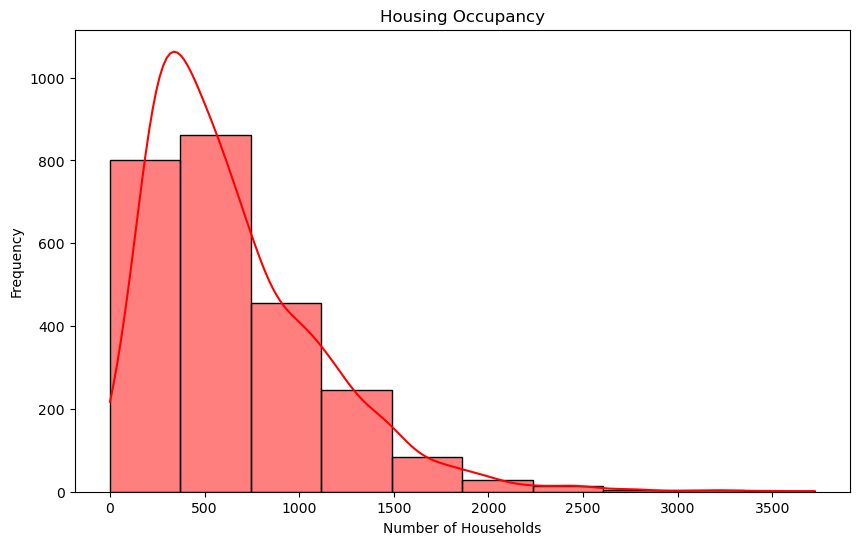

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(housing['hh_white'], bins=10, kde=True, color='red')
plt.title('Housing Occupancy')
plt.xlabel('Number of Households')
plt.ylabel('Frequency')
plt.show()

In [74]:
# I tried this plot bar to see the comparison between total occupancy and white occupancy, but the graph did not come out good.

<Axes: title={'center': 'Occupancy'}, xlabel='tot_hh'>

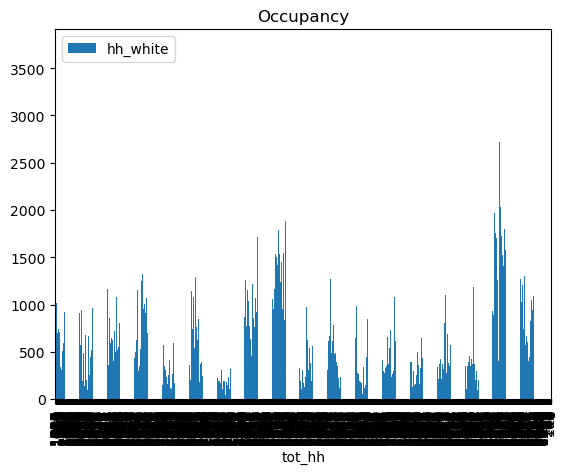

In [75]:
housing.plot.bar(x = 'tot_hh', y = 'hh_white', title = 'Occupancy')

In [ ]:
# Here I am see what is the highest amount of latino occupied housing units in the 10 highest census tracts, there are quite a few

In [76]:
housing.sort_values(by='hh_latino', ascending = False)[['GEO_ID', 'hh_latino']].head(10)

GEO_ID  hh_latino
1650  06037530302       1808
1176  06037320300       1808
1679  06037532101       1776
1604  06037502303       1758
1740  06037535101       1747
1581  06037500700       1704
1309  06037406103       1691
1603  06037502200       1649
1681  06037532200       1634
1708  06037533603       1630

In [ ]:
# I wanted to visualize the data again, it seems that native hawaiians and american indians have much less households than white and latinos reflecting LA County demographics

In [21]:
housing

GEO_ID  tot_hh  hh_white  hh_afram  hh_amerind  hh_asian  \
0     06037101110    1494      1105         0           0        92   
1     06037101122    1372      1064        10           0       136   
2     06037101220    1357       785         8          25       187   
3     06037101221    1450      1089        68           0        39   
4     06037101222     935       820        17           0        35   
...           ...     ...       ...       ...         ...       ...   
2493  06037980038       0         0         0           0         0   
2494  06037980039       0         0         0           0         0   
2495  06037990100       0         0         0           0         0   
2496  06037990200       0         0         0           0         0   
2497  06037990300       0         0         0           0         0   

      hh_nathawaii  hh_mixed  hh_latino  hh_whitenolatino  
0                0       209        401               951  
1                0       105         89              1045  
2                0       204        497               589  
3                0        66        329               983  
4               17        18        246               620  
...            ...       ...        ...               ...  
2493             0         0          0                 0  
2494             0         0          0                 0  
2495             0         0          0                 0  
2496             0         0          0                 0  
2497             0         0          0                 0  

[2498 rows x 10 columns]

In [ ]:
# Here I am reading in the Income data from the US Census, reading in the GEO_ID as a string once again, I cleaned this data in Excel, choosing only the data I would need

In [22]:
income = pd.read_csv(
    'data/Income_DataFinal.csv' ,
    dtype=
    {
        'GEO_ID': str
    }
)

In [ ]:
# Here I am checking the number of rows and colums

In [23]:
income.shape

(2460, 18)

In [ ]:
# Here I am checking the first 5 rows to see what the columns look like

In [24]:
income.head(5)

GEO_ID  total_household  less_10k  10k_14999  15k_19999  20k_24999  \
0  06037101110             1494        54        126         49         33   
1  06037101122             1372        88          0          7         42   
2  06037101220             1357        78         82         28        102   
3  06037101221             1450        76        107        118        148   
4  06037101222              935       161        167         34         41   

   25k_29999  30k_34999  35k_39999  40k_44999  45k_49999  50k_59999  \
0         61          6         60         85         43        149   
1         50         36          0         13          0         37   
2          7         86         43         55         36        189   
3          0         81        111         27         97        112   
4         19        116          0         86         14         35   

   60k_74999  75k_99999  100k_124999  125k_149999  150k_199999  more_200k  
0        105        146          210          134          143         90  
1        200        158          126          194          168        253  
2         89        134          116           60          140        112  
3         32        193          207           33          108          0  
4         44         96            9           81            0         32

In [77]:
# Here I am checking the .info once more to garner index dtype and columns, non-null values and memory usage

In [78]:
income.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GEO_ID           2460 non-null   object
 1   total_household  2460 non-null   int64 
 2   less_10k         2460 non-null   int64 
 3   10k_14999        2460 non-null   int64 
 4   15k_19999        2460 non-null   int64 
 5   20k_24999        2460 non-null   int64 
 6   25k_29999        2460 non-null   int64 
 7   30k_34999        2460 non-null   int64 
 8   35k_39999        2460 non-null   int64 
 9   40k_44999        2460 non-null   int64 
 10  45k_49999        2460 non-null   int64 
 11  50k_59999        2460 non-null   int64 
 12  60k_74999        2460 non-null   int64 
 13  75k_99999        2460 non-null   int64 
 14  100k_124999      2460 non-null   int64 
 15  125k_149999      2460 non-null   int64 
 16  150k_199999      2460 non-null   int64 
 17  more_200k        2460 non-null   

In [ ]:
# Here I am checking if any columns with no data made it through

In [26]:
income.columns[income.isna().all()].tolist()

[]

In [ ]:
# Here I wanted to see if I could plot all the info, I think there is just way too much data

<Axes: >

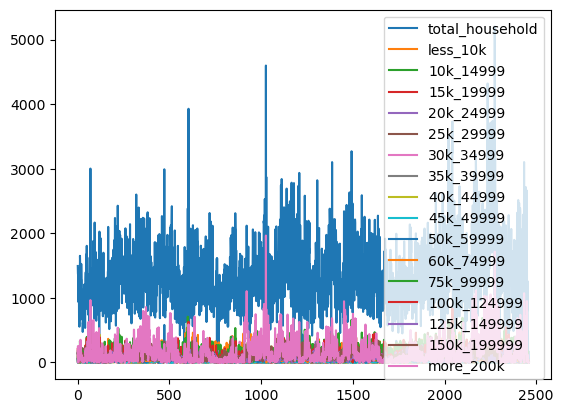

In [27]:
income.plot()

In [ ]:
# Here I wanted to once again see the first five rows to compare across income ranges

In [28]:
income.head()

GEO_ID  total_household  less_10k  10k_14999  15k_19999  20k_24999  \
0  06037101110             1494        54        126         49         33   
1  06037101122             1372        88          0          7         42   
2  06037101220             1357        78         82         28        102   
3  06037101221             1450        76        107        118        148   
4  06037101222              935       161        167         34         41   

   25k_29999  30k_34999  35k_39999  40k_44999  45k_49999  50k_59999  \
0         61          6         60         85         43        149   
1         50         36          0         13          0         37   
2          7         86         43         55         36        189   
3          0         81        111         27         97        112   
4         19        116          0         86         14         35   

   60k_74999  75k_99999  100k_124999  125k_149999  150k_199999  more_200k  
0        105        146          210          134          143         90  
1        200        158          126          194          168        253  
2         89        134          116           60          140        112  
3         32        193          207           33          108          0  
4         44         96            9           81            0         32

In [ ]:
# Here I am sorting the number of households making between 10 and 14k in each census tract, the most is 709 then after is 486 so it is a substantial difference

In [29]:
income.sort_values(by='10k_14999', ascending = False)[['GEO_ID', '10k_14999']].head(10)

GEO_ID  10k_14999
600   06037207502        709
2325  06037900806        486
595   06037207304        465
1152  06037310701        456
1154  06037310704        434
2019  06037575803        419
1580  06037500900        414
2234  06037700102        396
2260  06037701902        395
1121  06037301601        391

In [ ]:
# The next lines are condensing the data ranges into 4 categories, consolodating that into a new variable with the GEO_ID column, then plotting it on a scatter plot using the range 0-24999k as an example,

In [30]:
income['less10k_24999'] = income[['less_10k','10k_14999', '15k_19999', '20k_24999']].sum(axis=1)

In [31]:
income['25k_49999'] = income[['25k_29999','30k_34999', '35k_39999', '40k_44999','45k_49999']].sum(axis=1)

In [32]:
income['50k_124999'] = income[['50k_59999','60k_74999', '75k_99999', '100k_124999']].sum(axis=1)

In [33]:
income['125k_more200k'] = income[['125k_149999','150k_199999','more_200k']].sum(axis=1)

In [34]:
income_grouped = income[['GEO_ID', 'total_household','less10k_24999','25k_49999', '50k_124999','125k_more200k']].copy()

<Axes: xlabel='less10k_24999', ylabel='total_household'>

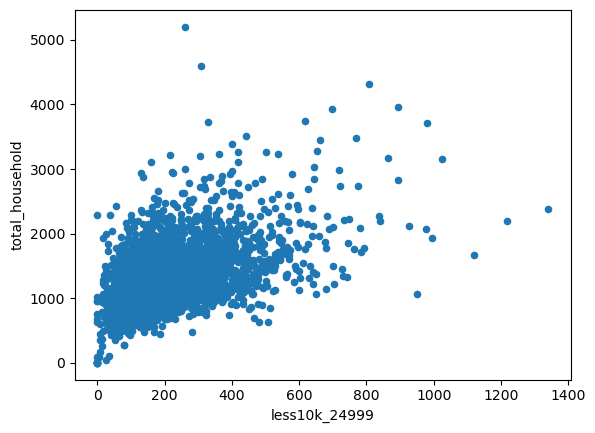

In [35]:
income_grouped.plot.scatter(x = 'less10k_24999', y = 'total_household')

In [ ]:
# Here I am using the histogram to plot the range of 0-24999k

<Axes: ylabel='Frequency'>

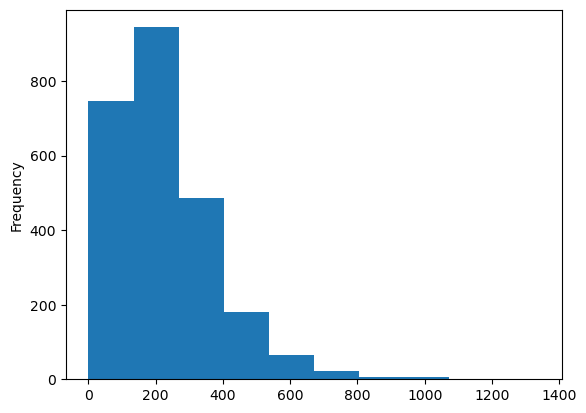

In [36]:
income_grouped['less10k_24999'].plot.hist()

In [ ]:
# Here I am using .head() to see the first five rows after consolodating the ranges

In [37]:
income_grouped.head()

GEO_ID  total_household  less10k_24999  25k_49999  50k_124999  \
0  06037101110             1494            262        255         610   
1  06037101122             1372            137         99         521   
2  06037101220             1357            290        227         528   
3  06037101221             1450            449        316         544   
4  06037101222              935            403        235         184   

   125k_more200k  
0            367  
1            615  
2            312  
3            141  
4            113

In [ ]:
# Here I am reading in the JSON file with the census tracts boundaries, and seeing the first five rows to preview the data

In [38]:
tracts = gpd.read_file('data/2020_Census_Tracts.geojson')
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0      4992  101110  1011.10  1.229562e+07   15083.854287   
1      4993  101122  1011.22  2.845774e+07   31671.455844   
2      4994  101220  1012.20  7.522093e+06   12698.783810   
3      4995  101221  1012.21  3.812000e+06    9161.710543   
4      4996  101222  1012.22  3.191371e+06    9980.600461   

                                            geometry  
0  POLYGON ((-118.29793 34.26323, -118.30082 34.2...  
1  POLYGON ((-118.27743 34.25991, -118.27743 34.2...  
2  POLYGON ((-118.27818 34.25577, -118.27887 34.2...  
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  
4  POLYGON ((-118.28594 34.25590, -118.28697 34.2...

In [ ]:
# Here I am checking the .info once more to garner index dtype and columns, non-null values and memory usage

In [39]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2496 non-null   int64   
 1   CT20           2496 non-null   object  
 2   LABEL          2496 non-null   object  
 3   ShapeSTArea    2496 non-null   float64 
 4   ShapeSTLength  2496 non-null   float64 
 5   geometry       2496 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [ ]:
# Here I am checking if any columns with no data made it through

In [40]:
tracts.columns[tracts.isna().all()].tolist()

[]

In [ ]:
# Creating a 'GEO_ID' column in the tracts dataset so that we can join it with the 'GEO_ID' column in the income dataset. Then using the shape to see how many rows and columns there are.

In [41]:
tracts['GEO_ID'] = '06' + '037' + tracts['CT20']
tracts.shape

(2496, 7)

In [ ]:
# Here I am using the .head() code to see the first five lines

In [42]:
tracts.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0      4992  101110  1011.10  1.229562e+07   15083.854287   
1      4993  101122  1011.22  2.845774e+07   31671.455844   
2      4994  101220  1012.20  7.522093e+06   12698.783810   
3      4995  101221  1012.21  3.812000e+06    9161.710543   
4      4996  101222  1012.22  3.191371e+06    9980.600461   

                                            geometry       GEO_ID  
0  POLYGON ((-118.29793 34.26323, -118.30082 34.2...  06037101110  
1  POLYGON ((-118.27743 34.25991, -118.27743 34.2...  06037101122  
2  POLYGON ((-118.27818 34.25577, -118.27887 34.2...  06037101220  
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221  
4  POLYGON ((-118.28594 34.25590, -118.28697 34.2...  06037101222

In [ ]:
# Perfoming my first merge here with the income and census tracts on the GEO_ID columns

In [43]:
income_tracts = tracts.merge(income_grouped, on="GEO_ID")

In [ ]:
# Checking again to see that no empty columns made it in

In [44]:
income_tracts.columns[income_tracts.isna().all()].tolist()

[]

In [ ]:
# Using the .head code to see first 10 lines to see how well data merged

In [45]:
income_tracts.head(10)

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0      4992  101110  1011.10  1.229562e+07   15083.854287   
1      4993  101122  1011.22  2.845774e+07   31671.455844   
2      4994  101220  1012.20  7.522093e+06   12698.783810   
3      4995  101221  1012.21  3.812000e+06    9161.710543   
4      4996  101222  1012.22  3.191371e+06    9980.600461   
5      4997  101300  1013.00  2.777377e+07   29384.860602   
6      4998  101400  1014.00  6.791532e+07   42668.928986   
7      4999  102103  1021.03  1.277023e+07   16349.935002   
8      5000  102104  1021.04  1.785120e+07   27555.466359   
9      5001  102105  1021.05  5.303654e+06    9962.251126   

                                            geometry       GEO_ID  \
0  POLYGON ((-118.29793 34.26323, -118.30082 34.2...  06037101110   
1  POLYGON ((-118.27743 34.25991, -118.27743 34.2...  06037101122   
2  POLYGON ((-118.27818 34.25577, -118.27887 34.2...  06037101220   
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221   
4  POLYGON ((-118.28594 34.25590, -118.28697 34.2...  06037101222   
5  POLYGON ((-118.26528 34.25238, -118.26539 34.2...  06037101300   
6  POLYGON ((-118.29946 34.25598, -118.30027 34.2...  06037101400   
7  POLYGON ((-118.34336 34.22588, -118.34398 34.2...  06037102103   
8  POLYGON ((-118.33807 34.22228, -118.33822 34.2...  06037102104   
9  POLYGON ((-118.34302 34.20656, -118.34374 34.2...  06037102105   

   total_household  less10k_24999  25k_49999  50k_124999  125k_more200k  
0             1494            262        255         610            367  
1             1372            137         99         521            615  
2             1357            290        227         528            312  
3             1450            449        316         544            141  
4              935            403        235         184            113  
5             1420            147        158         483            632  
6             1304            338        187         450            329  
7              669             97        197         156            219  
8             1310            157        220         523            410  
9              554             45         99         264            146

In [ ]:
# The following four maps are all based on the merged income_tracts variable each based off a different range of income

<Axes: >

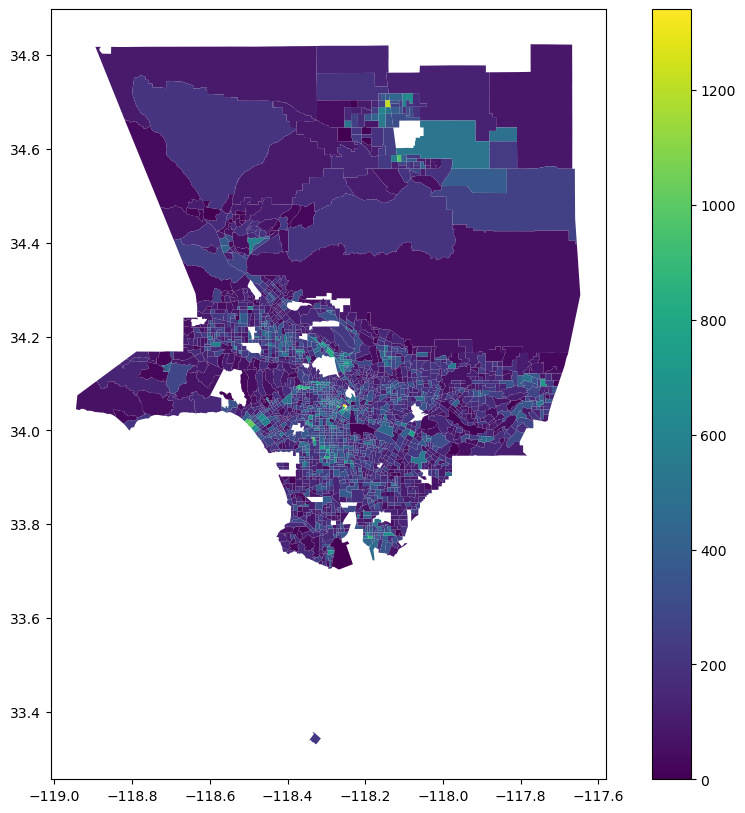

In [46]:
income_tracts.plot(figsize=(12,10),
                 column='less10k_24999',
                 legend=True, 
                 )

<Axes: >

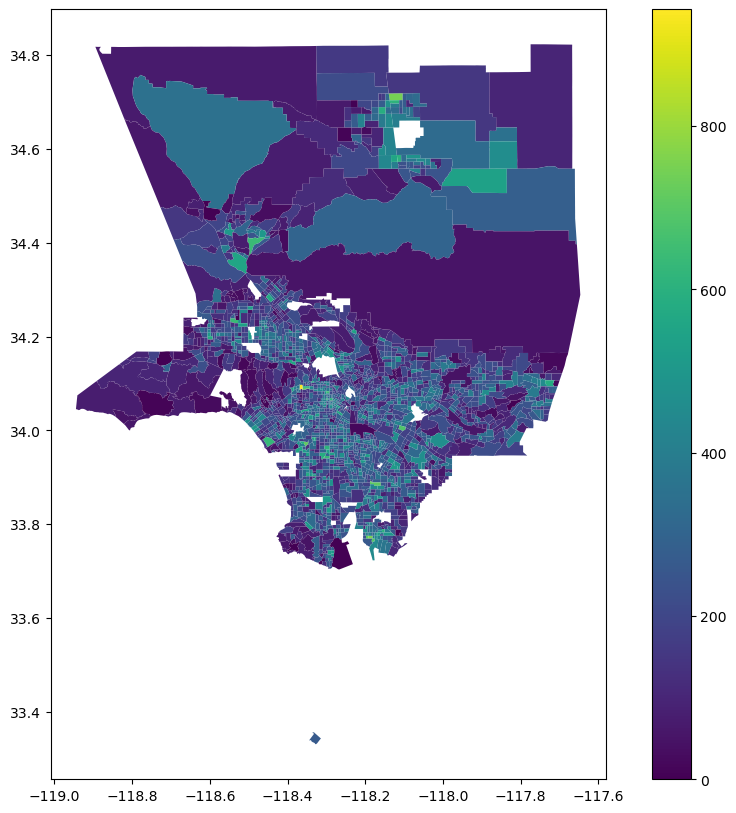

In [47]:
income_tracts.plot(figsize=(12,10),
                 column='25k_49999',
                 legend=True, 
                 )

<Axes: >

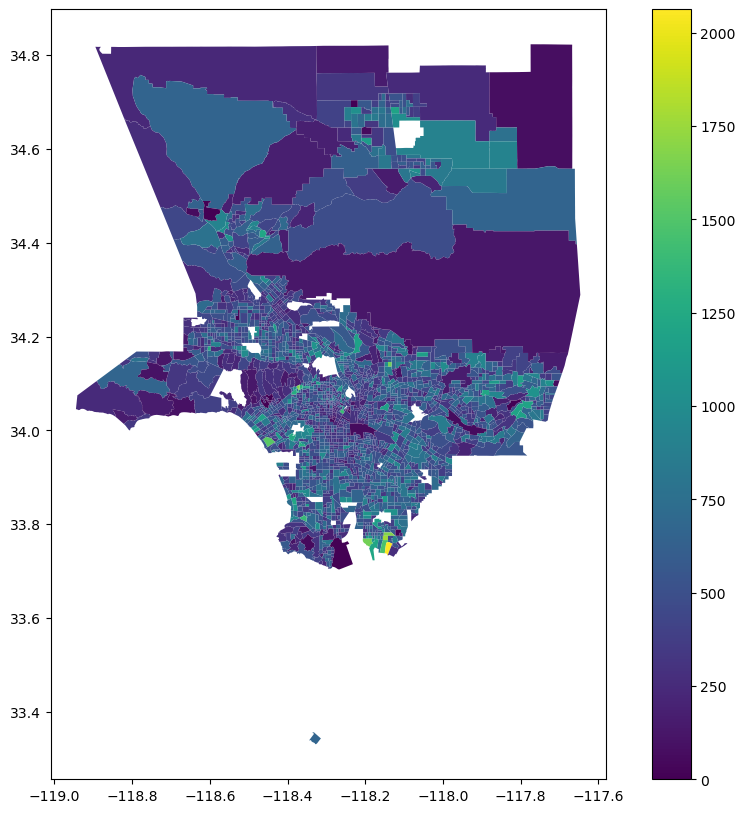

In [48]:
income_tracts.plot(figsize=(12,10),
                 column='50k_124999',
                 legend=True, 
                 )

<Axes: >

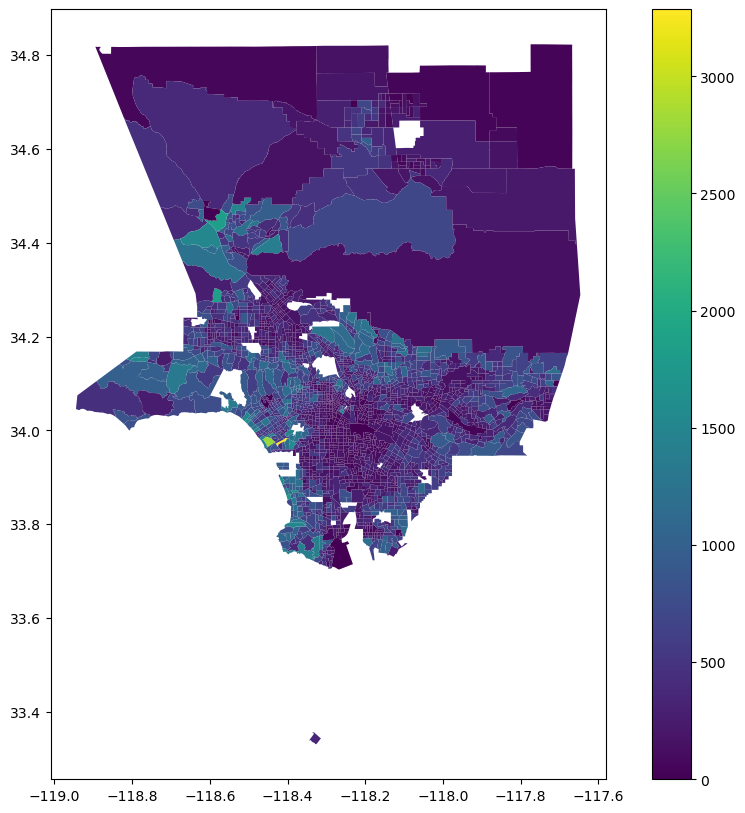

In [49]:
income_tracts.plot(figsize=(12,10),
                 column='125k_more200k',
                 legend=True, 
                 )

In [ ]:
# Here I am reading in the District boundaries and unincorporated communities data, I cleaned this in Excel, also reading in CT20 as a string

In [50]:
dd5 = pd.read_csv('data/districts.csv',
    dtype=
    {
        'CT20':str
    }
)

In [ ]:
# Here I am using the .head() function to preview how the code looks after reading it in

In [51]:
dd5.head(10)

OBJECTID_12  Join_Count  TARGET_FID    CT20    LABEL               NAME  \
0           22           1          22  104124  1041.24  5TH SUP. DISTRICT   
1         1102           1        1102  300100  3001.00  5TH SUP. DISTRICT   
2         1103           1        1103  300200  3002.00  5TH SUP. DISTRICT   
3         1106           1        1106  300501  3005.01  5TH SUP. DISTRICT   
4         1107           1        1107  300503  3005.03  5TH SUP. DISTRICT   
5         1267           2        1267  403801  4038.01  5TH SUP. DISTRICT   
6         1268           2        1268  403802  4038.02  5TH SUP. DISTRICT   
7         1406           2        1406  431200  4312.00  5TH SUP. DISTRICT   
8         1407           1        1407  431300  4313.00  5TH SUP. DISTRICT   
9         1408           2        1408  431400  4314.00  5TH SUP. DISTRICT   

                       SUP_NAME  DIST_SUP  CITYNAME_ALF  \
0  5TH DISTRICT: KATHRYN BARGER         5           NaN   
1  5TH DISTRICT: KATHRYN BARGER         5           NaN   
2  5TH DISTRICT: KATHRYN BARGER         5           NaN   
3  5TH DISTRICT: KATHRYN BARGER         5           NaN   
4  5TH DISTRICT: KATHRYN BARGER         5           NaN   
5  5TH DISTRICT: KATHRYN BARGER         5           NaN   
6  5TH DISTRICT: KATHRYN BARGER         5           NaN   
7  5TH DISTRICT: KATHRYN BARGER         5           NaN   
8  5TH DISTRICT: KATHRYN BARGER         5           NaN   
9  5TH DISTRICT: KATHRYN BARGER         5           NaN   

                    NAME_1         JURISDICTION  AREA_NUM  \
0    KAGEL / LOPEZ CANYONS  UNINCORPORATED AREA         3   
1  LA CRESCENTA - MONTROSE  UNINCORPORATED AREA         1   
2  LA CRESCENTA - MONTROSE  UNINCORPORATED AREA         3   
3  LA CRESCENTA - MONTROSE  UNINCORPORATED AREA         3   
4  LA CRESCENTA - MONTROSE  UNINCORPORATED AREA         3   
5              CHARTER OAK  UNINCORPORATED AREA         6   
6              CHARTER OAK  UNINCORPORATED AREA         6   
7   SOUTH MONROVIA ISLANDS  UNINCORPORATED AREA         7   
8   SOUTH MONROVIA ISLANDS  UNINCORPORATED AREA         7   
9   SOUTH MONROVIA ISLANDS  UNINCORPORATED AREA         7   

                               AREA_NAME  Shape__Area  Shape__Length  
0      San Fernando Valley Planning Area  6579433.180   14622.375950  
1  West San Gabriel Valley Planning Area  6762583.121   11523.542530  
2  West San Gabriel Valley Planning Area  2865626.273    8208.996045  
3  West San Gabriel Valley Planning Area  1847789.078    7553.876038  
4  West San Gabriel Valley Planning Area  1588110.230    6713.196575  
5  East San Gabriel Valley Planning Area  2752860.281    7988.379651  
6  East San Gabriel Valley Planning Area  1906540.258    5960.990718  
7  West San Gabriel Valley Planning Area  2176540.793    7587.556455  
8  West San Gabriel Valley Planning Area  1194762.637    5290.775866  
9  West San Gabriel Valley Planning Area  2629954.082    7879.437300

In [ ]:
# Here I am going to create GEOID variable which corresponds to the unincorporated census tracts.

In [52]:
dd5['GEO_ID'] ='06' + '037' + dd5['CT20']
dd5

OBJECTID_12  Join_Count  TARGET_FID    CT20    LABEL               NAME  \
0            22           1          22  104124  1041.24  5TH SUP. DISTRICT   
1          1102           1        1102  300100  3001.00  5TH SUP. DISTRICT   
2          1103           1        1103  300200  3002.00  5TH SUP. DISTRICT   
3          1106           1        1106  300501  3005.01  5TH SUP. DISTRICT   
4          1107           1        1107  300503  3005.03  5TH SUP. DISTRICT   
..          ...         ...         ...     ...      ...                ...   
58         2453           1        2453  920338  9203.38  5TH SUP. DISTRICT   
59         2454           1        2454  920339  9203.39  5TH SUP. DISTRICT   
60         2459           3        2459  930400  9304.00  5TH SUP. DISTRICT   
61         2462           1        2462  980003  9800.03  5TH SUP. DISTRICT   
62         2495           1        2495  980039  9800.39  5TH SUP. DISTRICT   

                        SUP_NAME  DIST_SUP  CITYNAME_ALF  \
0   5TH DISTRICT: KATHRYN BARGER         5           NaN   
1   5TH DISTRICT: KATHRYN BARGER         5           NaN   
2   5TH DISTRICT: KATHRYN BARGER         5           NaN   
3   5TH DISTRICT: KATHRYN BARGER         5           NaN   
4   5TH DISTRICT: KATHRYN BARGER         5           NaN   
..                           ...       ...           ...   
58  5TH DISTRICT: KATHRYN BARGER         5           NaN   
59  5TH DISTRICT: KATHRYN BARGER         5           NaN   
60  5TH DISTRICT: KATHRYN BARGER         5           NaN   
61  5TH DISTRICT: KATHRYN BARGER         5           NaN   
62  5TH DISTRICT: KATHRYN BARGER         5           NaN   

                     NAME_1         JURISDICTION  AREA_NUM  \
0     KAGEL / LOPEZ CANYONS  UNINCORPORATED AREA         3   
1   LA CRESCENTA - MONTROSE  UNINCORPORATED AREA         1   
2   LA CRESCENTA - MONTROSE  UNINCORPORATED AREA         3   
3   LA CRESCENTA - MONTROSE  UNINCORPORATED AREA         3   
4   LA CRESCENTA - MONTROSE  UNINCORPORATED AREA         3   
..                      ...                  ...       ...   
58     SANTA CLARITA VALLEY  UNINCORPORATED AREA         2   
59     SANTA CLARITA VALLEY  UNINCORPORATED AREA         2   
60          ANTELOPE VALLEY  UNINCORPORATED AREA         1   
61          ANTELOPE VALLEY  UNINCORPORATED AREA         1   
62           UNIVERSAL CITY  UNINCORPORATED AREA         3   

                                AREA_NAME   Shape__Area  Shape__Length  \
0       San Fernando Valley Planning Area  6.579433e+06   14622.375950   
1   West San Gabriel Valley Planning Area  6.762583e+06   11523.542530   
2   West San Gabriel Valley Planning Area  2.865626e+06    8208.996045   
3   West San Gabriel Valley Planning Area  1.847789e+06    7553.876038   
4   West San Gabriel Valley Planning Area  1.588110e+06    6713.196575   
..                                    ...           ...            ...   
58     Santa Clarita Valley Planning Area  5.481003e+06   12655.913180   
59     Santa Clarita Valley Planning Area  5.027563e+07   32338.296370   
60          Antelope Valley Planning Area  2.195480e+09  349050.813800   
61          Antelope Valley Planning Area  2.869854e+08  101175.574600   
62      San Fernando Valley Planning Area  1.990662e+06    7196.703430   

         GEO_ID  
0   06037104124  
1   06037300100  
2   06037300200  
3   06037300501  
4   06037300503  
..          ...  
58  06037920338  
59  06037920339  
60  06037930400  
61  06037980003  
62  06037980039  

[63 rows x 16 columns]

In [ ]:
# Here I am merging the income_tracts with the district boundaries and the unincorporated communities, merging it on the GEO_ID then using the .head function to s ee first five lines

In [53]:
district_income_tracts = income_tracts.merge(dd5,on = "GEO_ID")
district_income_tracts.head()

OBJECTID  CT20_x  LABEL_x   ShapeSTArea  ShapeSTLength  \
0      5013  104124  1041.24  4.822168e+07   39589.712191   
1      6080  300100  3001.00  4.961759e+07   31214.277604   
2      6081  300200  3002.00  2.103232e+07   22239.275328   
3      6084  300501  3005.01  1.356426e+07   20460.861691   
4      6085  300503  3005.03  1.166072e+07   18182.529787   

                                            geometry       GEO_ID  \
0  POLYGON ((-118.37077 34.28212, -118.37072 34.2...  06037104124   
1  POLYGON ((-118.23882 34.25226, -118.24338 34.2...  06037300100   
2  POLYGON ((-118.22709 34.22875, -118.22705 34.2...  06037300200   
3  POLYGON ((-118.23126 34.21891, -118.23139 34.2...  06037300501   
4  POLYGON ((-118.22210 34.20618, -118.22210 34.2...  06037300503   

   total_household  less10k_24999  25k_49999  ...               NAME  \
0             1281            316        199  ...  5TH SUP. DISTRICT   
1             2102            105        103  ...  5TH SUP. DISTRICT   
2             1827            287        258  ...  5TH SUP. DISTRICT   
3             1025             69        148  ...  5TH SUP. DISTRICT   
4             2213            408        546  ...  5TH SUP. DISTRICT   

                       SUP_NAME  DIST_SUP  CITYNAME_ALF  \
0  5TH DISTRICT: KATHRYN BARGER         5           NaN   
1  5TH DISTRICT: KATHRYN BARGER         5           NaN   
2  5TH DISTRICT: KATHRYN BARGER         5           NaN   
3  5TH DISTRICT: KATHRYN BARGER         5           NaN   
4  5TH DISTRICT: KATHRYN BARGER         5           NaN   

                    NAME_1         JURISDICTION  AREA_NUM  \
0    KAGEL / LOPEZ CANYONS  UNINCORPORATED AREA         3   
1  LA CRESCENTA - MONTROSE  UNINCORPORATED AREA         1   
2  LA CRESCENTA - MONTROSE  UNINCORPORATED AREA         3   
3  LA CRESCENTA - MONTROSE  UNINCORPORATED AREA         3   
4  LA CRESCENTA - MONTROSE  UNINCORPORATED AREA         3   

                               AREA_NAME  Shape__Area  Shape__Length  
0      San Fernando Valley Planning Area  6579433.180   14622.375950  
1  West San Gabriel Valley Planning Area  6762583.121   11523.542530  
2  West San Gabriel Valley Planning Area  2865626.273    8208.996045  
3  West San Gabriel Valley Planning Area  1847789.078    7553.876038  
4  West San Gabriel Valley Planning Area  1588110.230    6713.196575  

[5 rows x 27 columns]

In [ ]:
# Here I am checking the .info once more to garner index dtype and columns, non-null values and memory usage

In [54]:
district_income_tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         61 non-null     int64   
 1   CT20_x           61 non-null     object  
 2   LABEL_x          61 non-null     object  
 3   ShapeSTArea      61 non-null     float64 
 4   ShapeSTLength    61 non-null     float64 
 5   geometry         61 non-null     geometry
 6   GEO_ID           61 non-null     object  
 7   total_household  61 non-null     int64   
 8   less10k_24999    61 non-null     int64   
 9   25k_49999        61 non-null     int64   
 10  50k_124999       61 non-null     int64   
 11  125k_more200k    61 non-null     int64   
 12  OBJECTID_12      61 non-null     int64   
 13  Join_Count       61 non-null     int64   
 14  TARGET_FID       61 non-null     int64   
 15  CT20_y           61 non-null     object  
 16  LABEL_y          61 non-null     float

In [ ]:
# The following five graphs are based off the merged dataset each based off a different range in income

<Axes: >

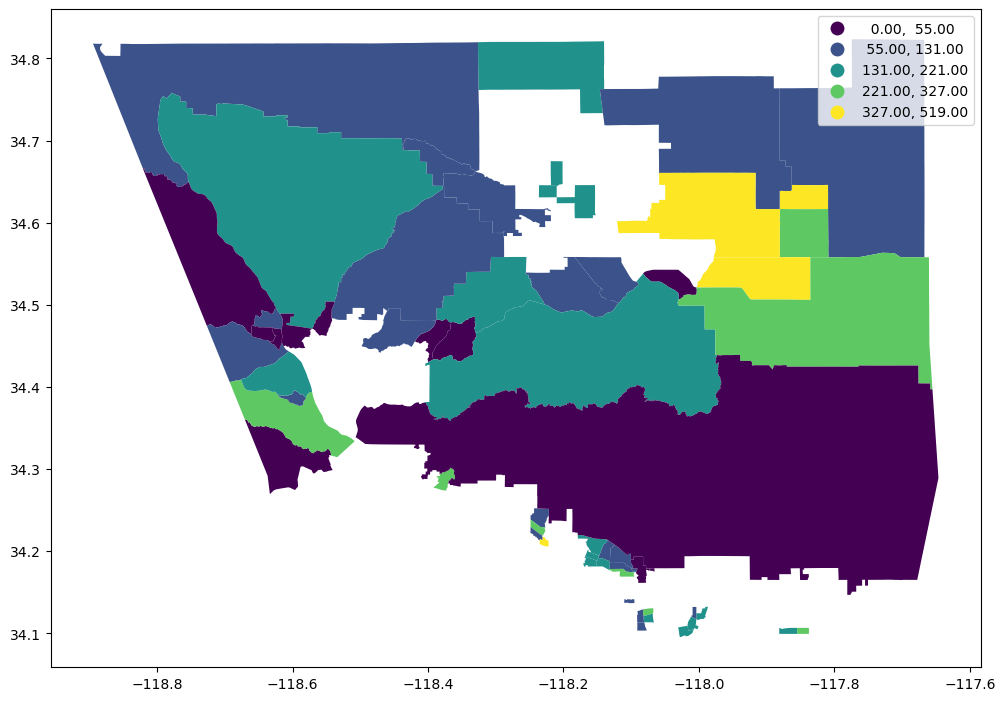

In [55]:
district_income_tracts.plot(figsize=(12,10),
                            column='less10k_24999',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

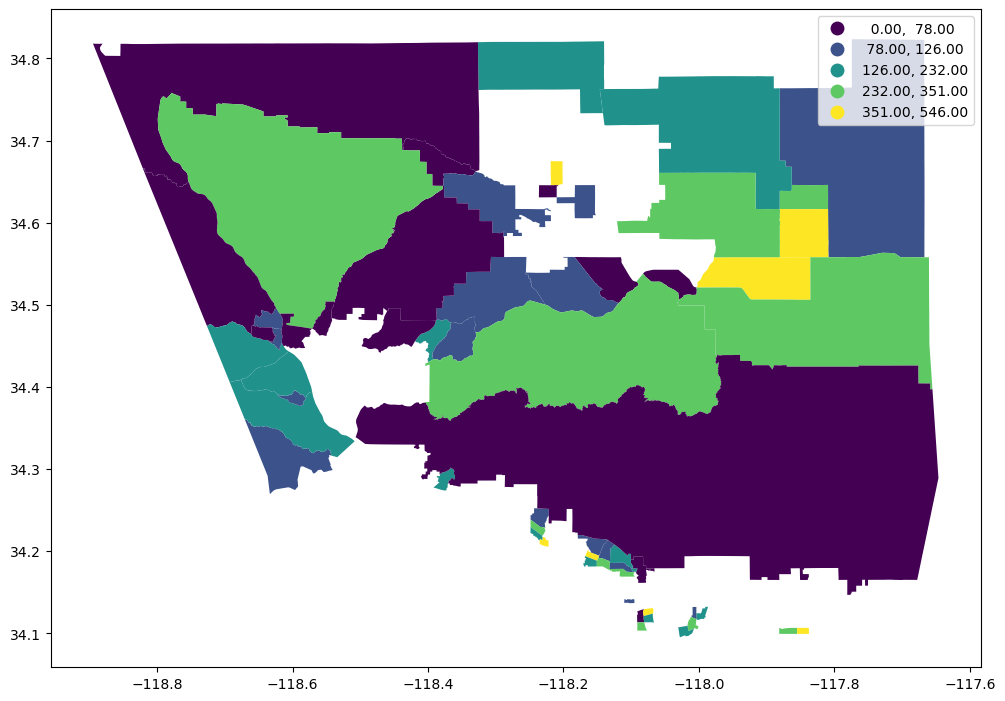

In [56]:
district_income_tracts.plot(figsize=(12,10),
                            column='25k_49999',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

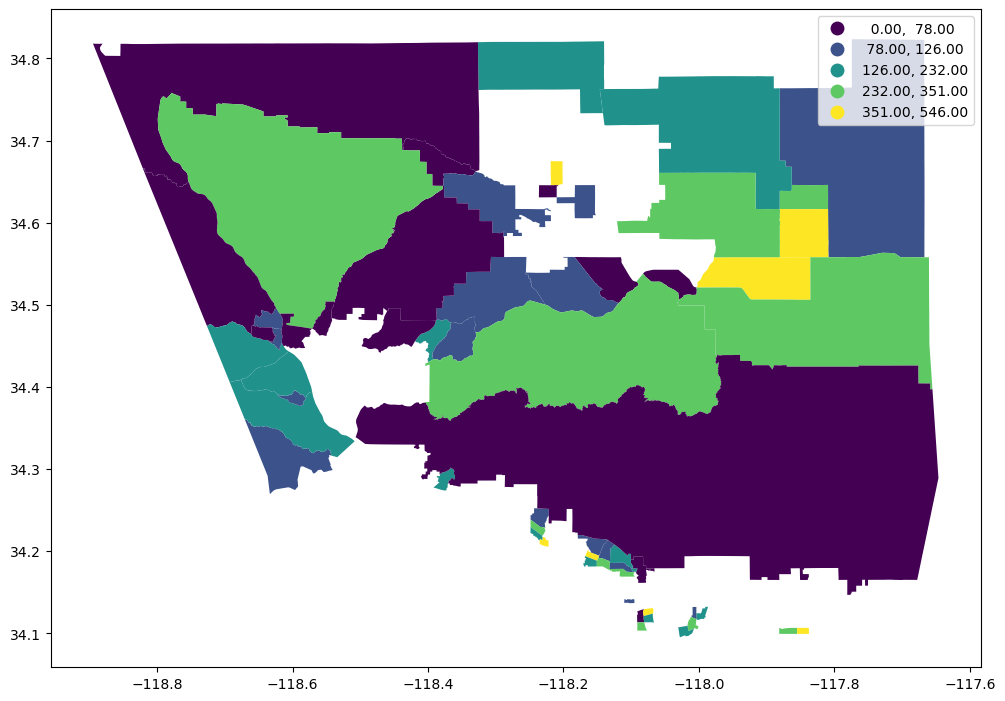

In [57]:
district_income_tracts.plot(figsize=(12,10),
                            column='25k_49999',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

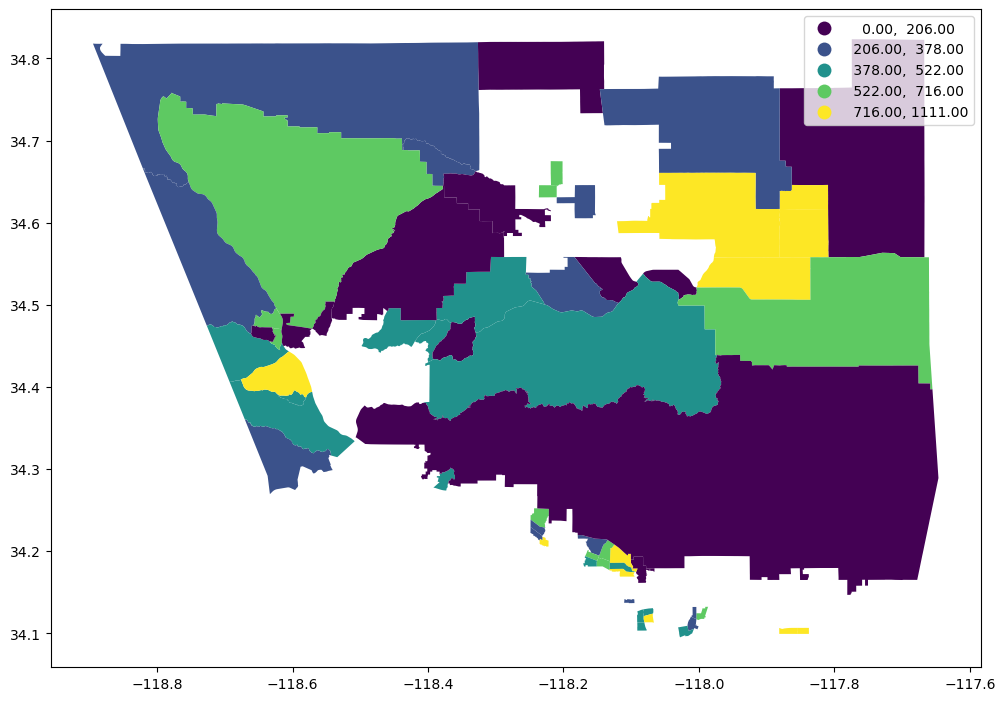

In [58]:
district_income_tracts.plot(figsize=(12,10),
                            column='50k_124999',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

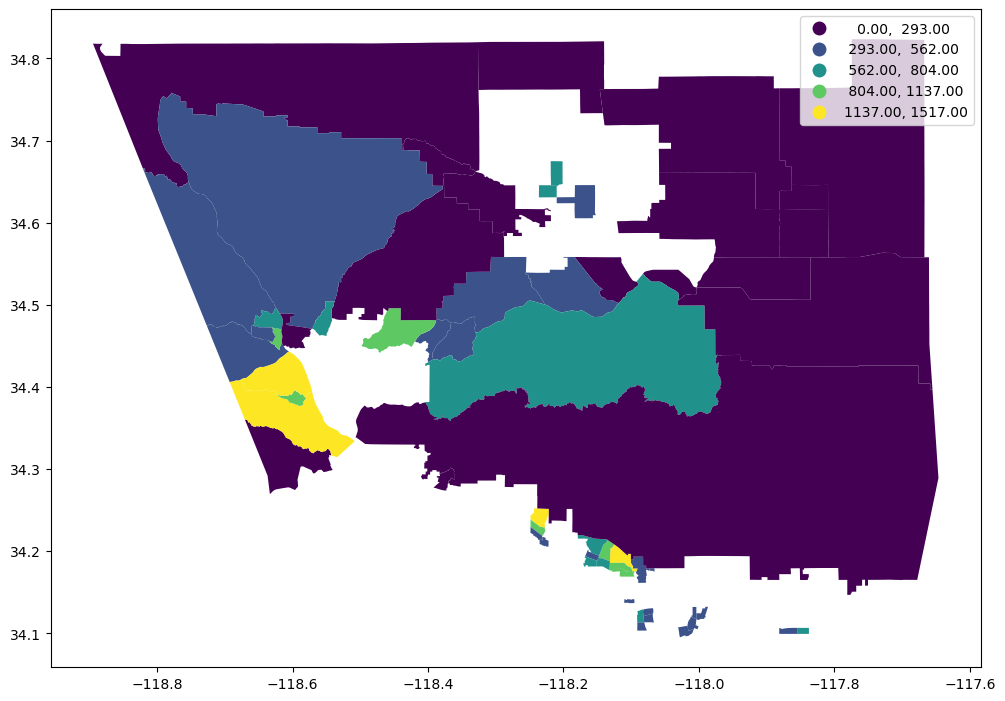

In [59]:
district_income_tracts.plot(figsize=(12,10),
                            column='125k_more200k',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
# Here I am once again merging this time with the housing data I compiled earlier, this is my monster_tract

In [60]:
monster_tracts = district_income_tracts.merge(housing,on = "GEO_ID")

In [ ]:
# The following 9 graphs are all based off the combined merges of all the data, each map based off a different column, each a different race/ethnicity

<Axes: >

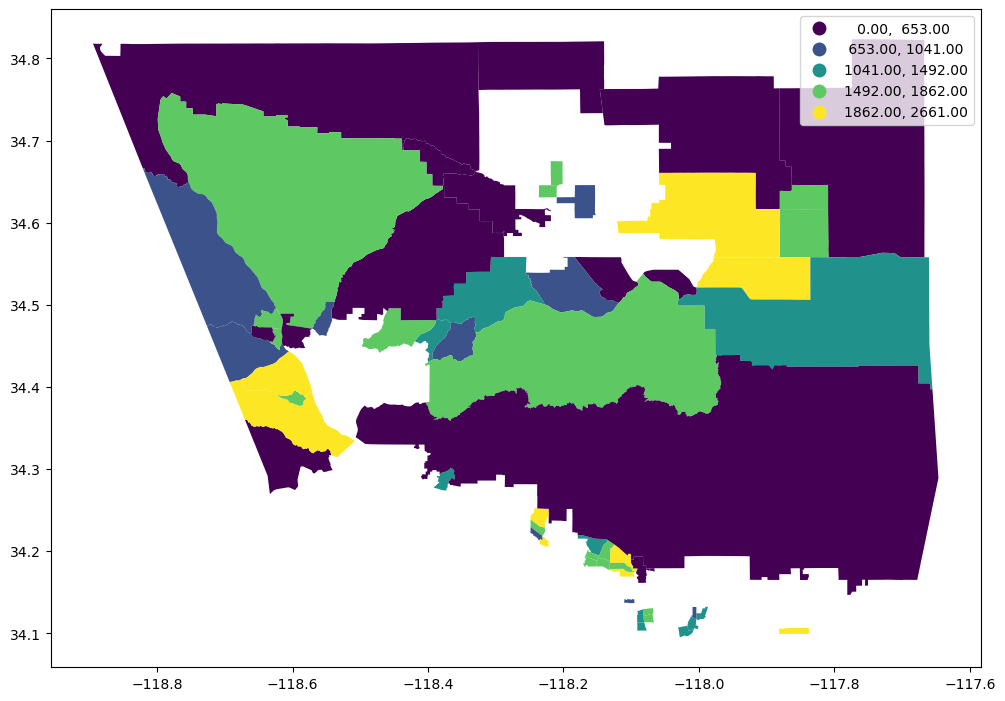

In [61]:
monster_tracts.plot(figsize=(12,10),
                            column='tot_hh',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

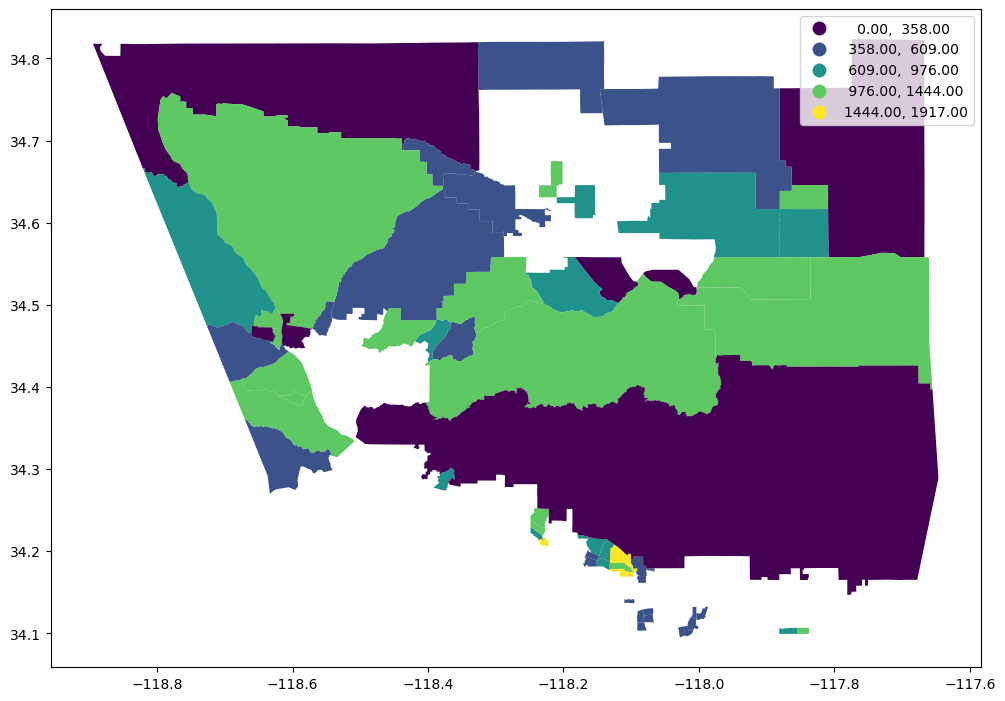

In [62]:
monster_tracts.plot(figsize=(12,10),
                            column='hh_white',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

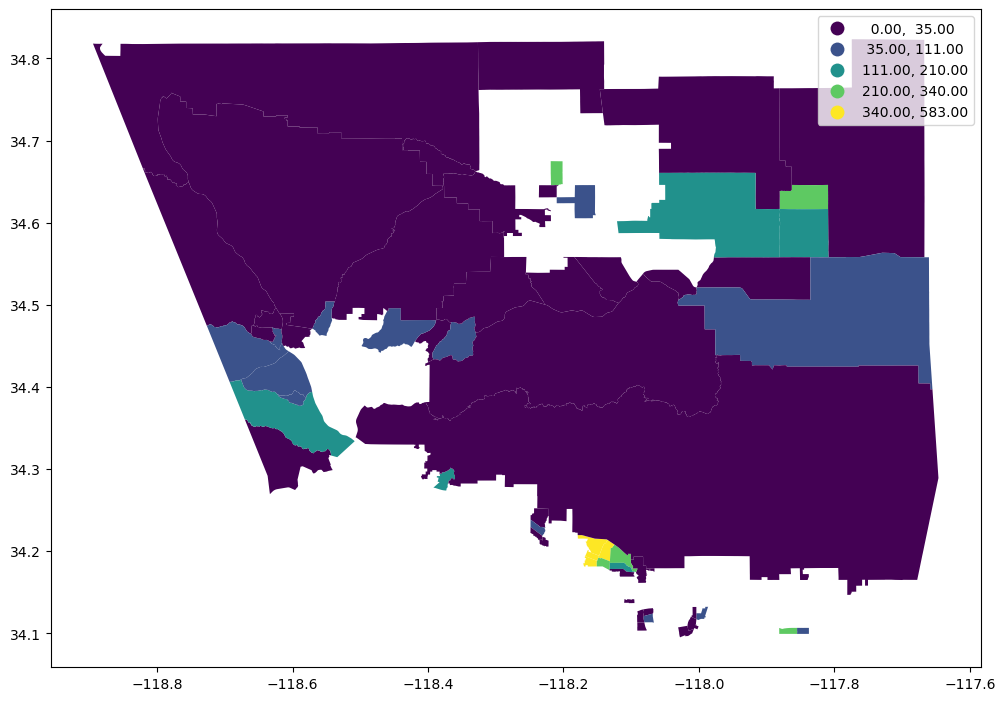

In [63]:
monster_tracts.plot(figsize=(12,10),
                            column='hh_afram',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

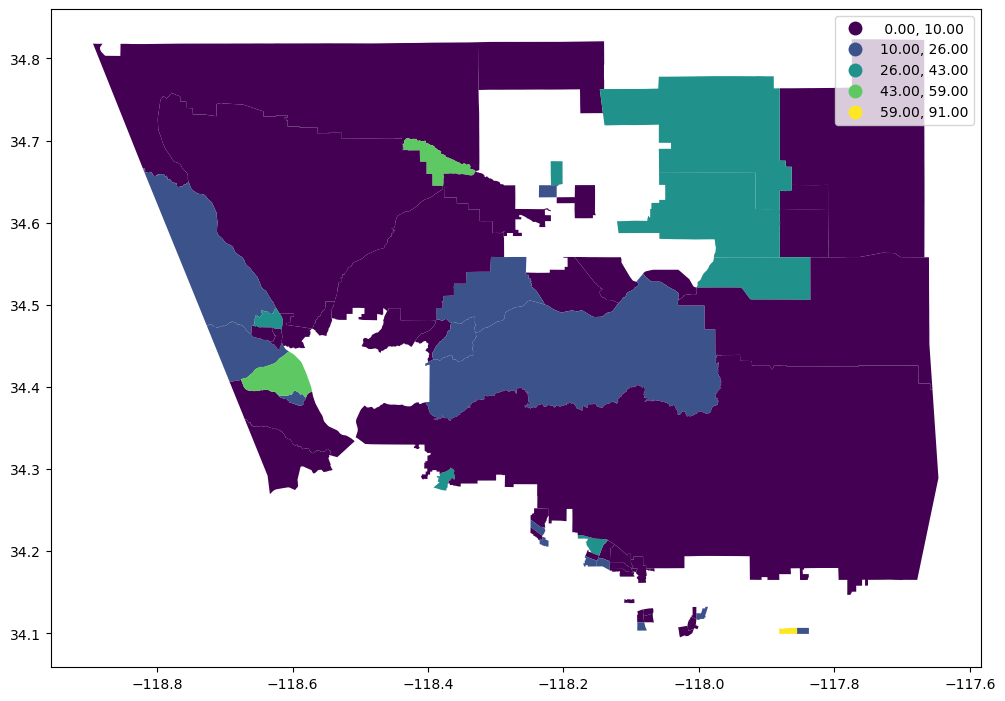

In [64]:
monster_tracts.plot(figsize=(12,10),
                            column='hh_amerind',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

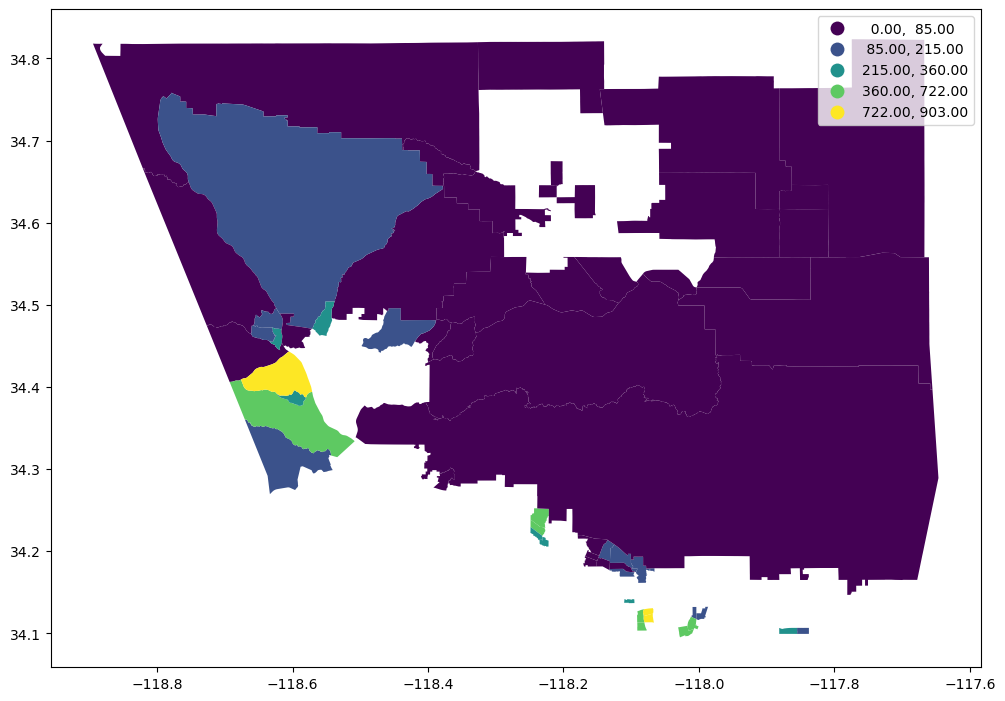

In [65]:
monster_tracts.plot(figsize=(12,10),
                            column='hh_asian',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

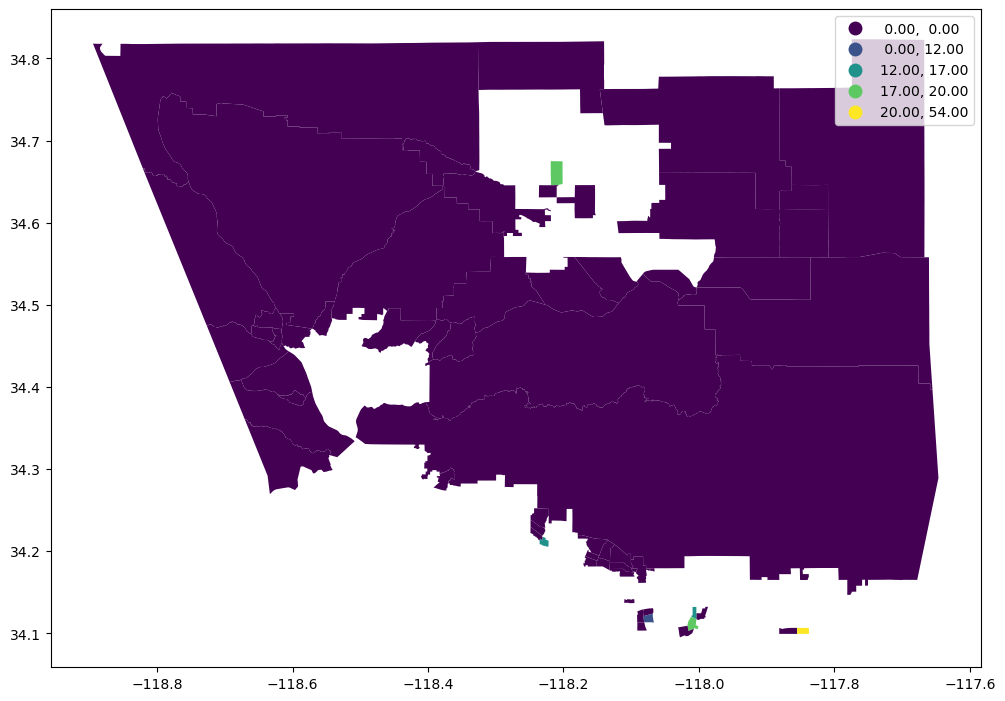

In [66]:
monster_tracts.plot(figsize=(12,10),
                            column='hh_nathawaii',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

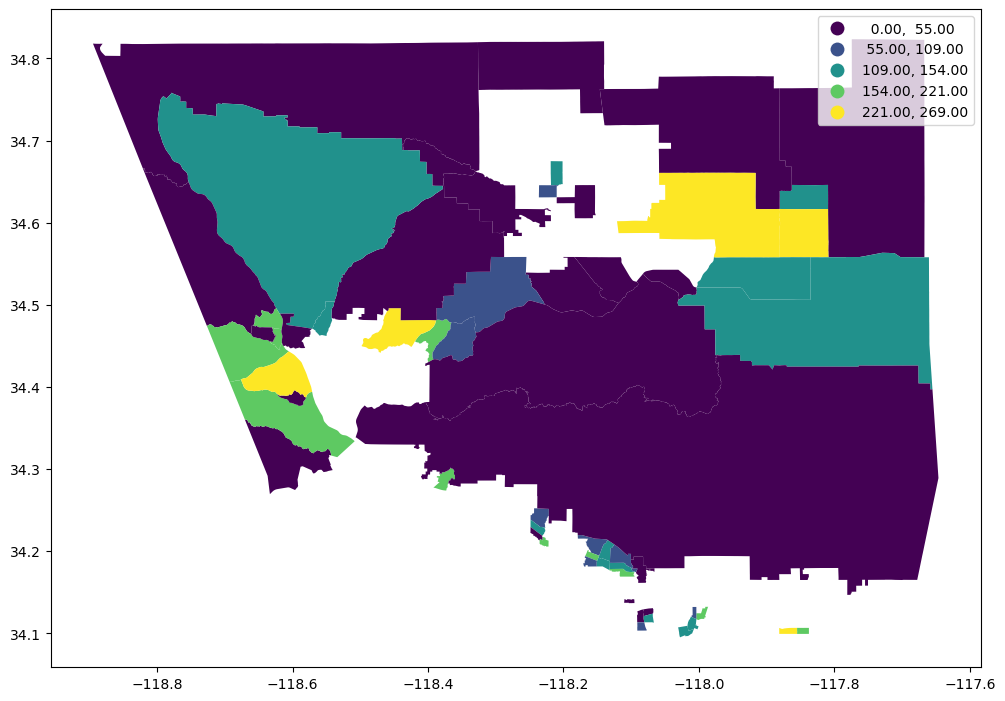

In [67]:
monster_tracts.plot(figsize=(12,10),
                            column='hh_mixed',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

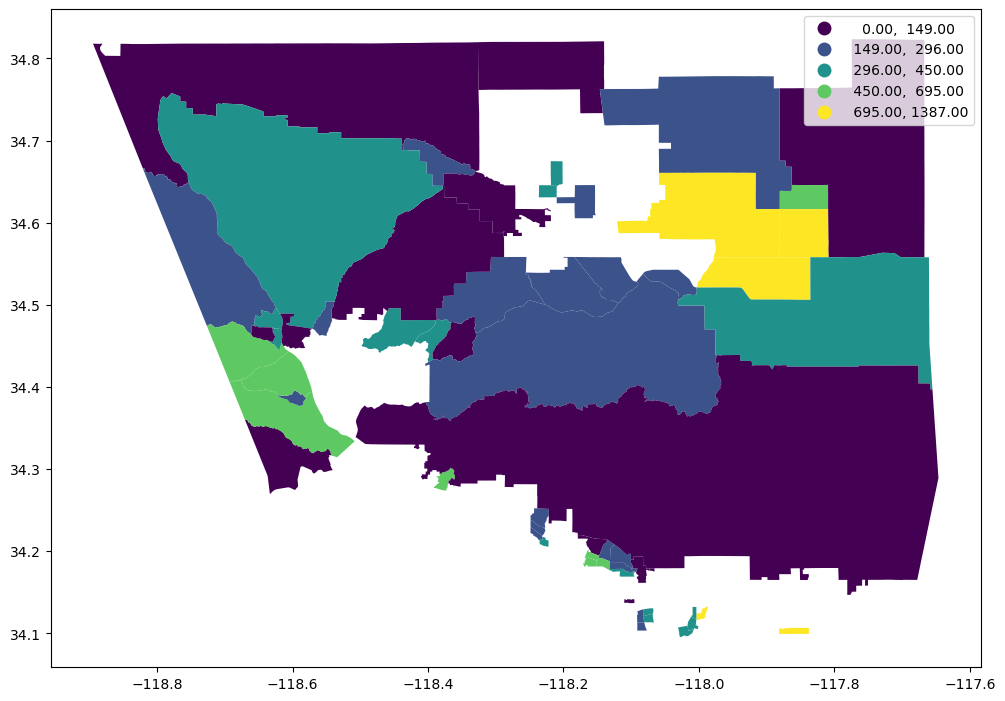

In [68]:
monster_tracts.plot(figsize=(12,10),
                            column='hh_latino',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

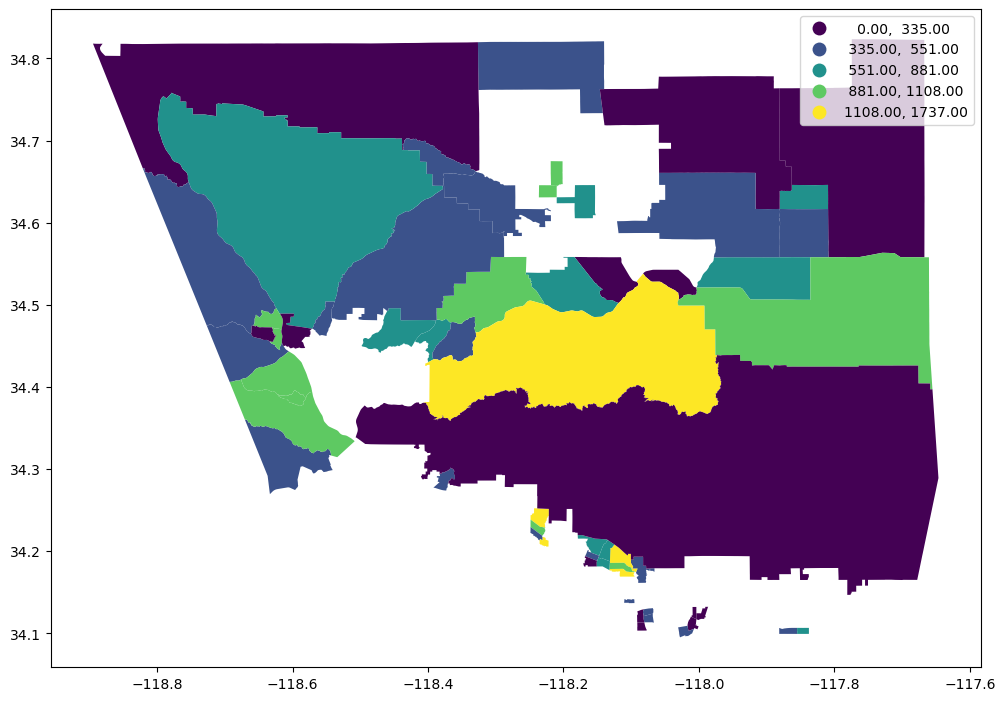

In [69]:
monster_tracts.plot(figsize=(12,10),
                            column='hh_whitenolatino',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
# Here I am importing the folium package to see the data as a whole using the folium package.

In [70]:
import folium

In [71]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=monster_tracts, # geo data
                  data=monster_tracts, # data          
                  key_on='feature.properties.GEO_ID', # key, or merge column
                  columns=['GEO_ID', 'less10k_24999'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Number of Households making less than 25k District 5').add_to(m)    # name on the legend color bar
m

In [72]:
m.save('Purple_Households.html')